# 1.TỔNG QUAN VỀ DATASET


*   Dataset là về sự hao hụt nhân viên dựa trên các thuộc tính như là : tuổi, thời gian làm việc mỗi ngày, phòng ban làm việc, học vấn, giới tính,.v.v 
*   Bao gồm 1470 dòng, 35 thuộc tính

# 2.TỔNG QUAN VỀ ĐỀ TÀI

Mô hình hóa chi phí kinh doanh của nguồn dữ liệu duy trì, từ đó tạo ra đưa ra dự đoán về việc công ty có đang thiếu nhân sự hay không. Từ đó giúp người lãnh đạo có thêm góc nhìn về các vấn đề trong công ty như môi trường làm việc, lương thưởng hay có đang ép nhân viên làm việc quá sức hay không, từ đó có những quyết định, định hướng trong tương lai cũng như một sự thay đổi sớm hơn trong cách thức hoạt động của công ty để đảm bảo nguồn nhân lực của mình đầy đủ và tốt nhất.

# 3.THÊM PACKAGE VÀ THƯ VIỆN

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import time
from datetime import timedelta
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# 4.ĐỌC DỮ LIỆU

In [88]:
df_hr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_Employeee_Attrition.csv')
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 5.XỬ LÝ DỮ LIỆU

## 5.1.Kiểu dữ liệu của các cột

In [89]:
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## 5.2.Kiểm tra giá trị null

In [90]:
df_hr.isnull().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

## 5.3.Mô tả thông tin của các dữ liệu kiểu "SỐ"

In [91]:
df_hr.describe(include=['int64'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 5.4.Mô tả thông tin của các dữ liệu kiểu "CHUỖI"

In [92]:
df_hr.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## 5.5.Kiểm tra OUTLIERS của các cột thuộc tính 

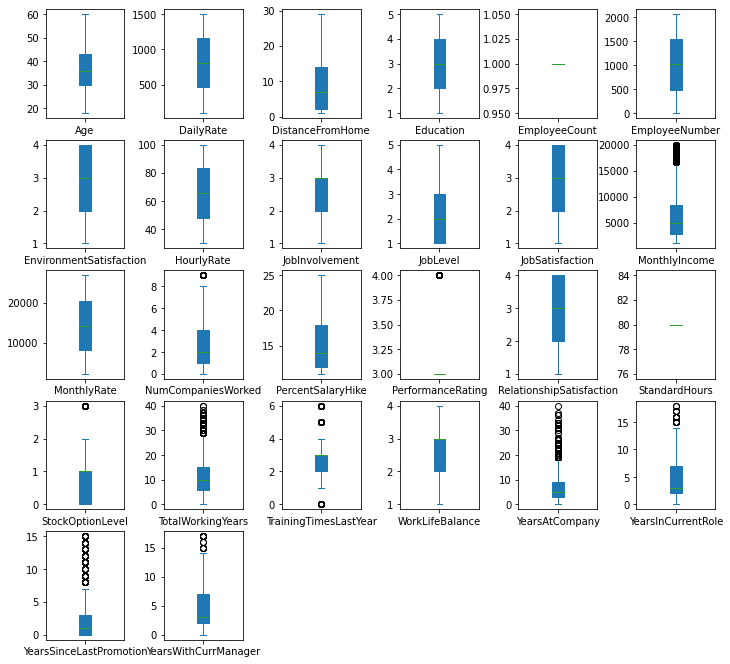

In [93]:
#Loại bỏ đi những thuộc tính có giá trị là "CHUỖI" chỉ dùng những cột có giá trị "SỐ" để kiểm tra OUTLIERS
df_to_plot = df_hr.drop(columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(6,6),kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

* Các cột đều có OUTLIERS, nhưng không có OUTLIERS nào phi logic

  **=> Không cần xử lý các OUTLIERS**

## 5.6.Phân loại dữ liệu

In [94]:
continuous_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

## 5.7.Sử dụng Label Encoder để chuyển đổi các cột từ OBJECT sang NUMERIC


In [95]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df_hr[i][0]) == str:
        text_categorical_features.append(i)
        df_hr[i] = le.fit_transform(df_hr[i])
        l1.append(list(df_hr[i].unique())); l2.append(list(le.inverse_transform(df_hr[i].unique())))
        print(i,' : ',df_hr[i].unique(),' = ',le.inverse_transform(df_hr[i].unique()))

Label Encoder Transformation


100%|██████████| 20/20 [00:00<00:00, 431.56it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [96]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [97]:
df_hr.to_csv (r'hr_encoding.csv', index = False, header=True)

## 5.8.Tổng quan các giá trị của DỮ LIỆU RỜI RẠC

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


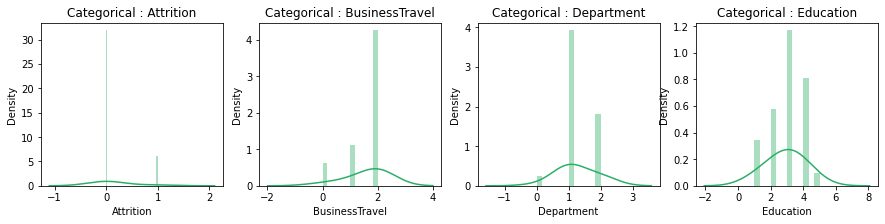

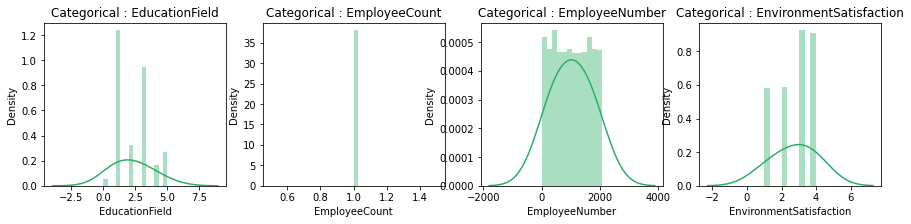

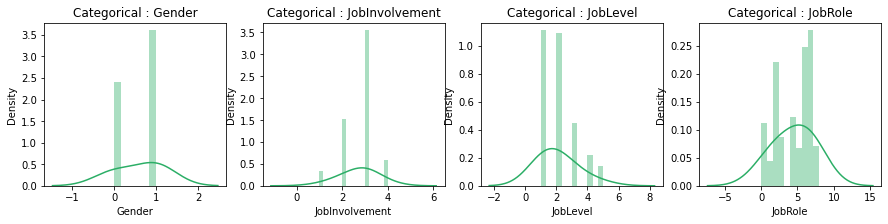

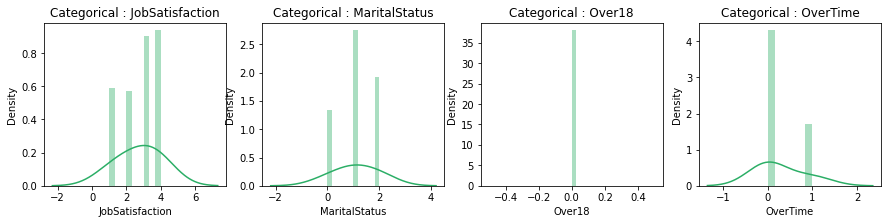

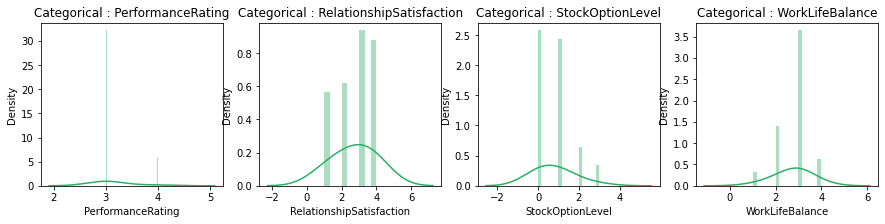

In [98]:
colors = ['#2BAE66','#FCF6F5']
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a) 
        sns.distplot(df_hr[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Categorical : ' + j)
        a += 1

* Cột Over18 và EmployeeCount chỉ có một giá trị duy nhất 

  **=> Xóa bỏ cột**

* Cột EmployeeNumber chỉ là những con số thứ tự của các nhân viên nên chúng 
không cần thiết 

  **=> Xóa bỏ cột**

In [99]:
del df_hr['Over18']
del df_hr['EmployeeCount']
del df_hr['EmployeeNumber']
categorical_features.remove('EmployeeCount'); 
categorical_features.remove('EmployeeNumber') 
categorical_features.remove('Over18'); 
categorical_features.remove('Attrition')

## 5.9.Tổng quan các giá trị của DỮ LIỆU LIÊN TỤC

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


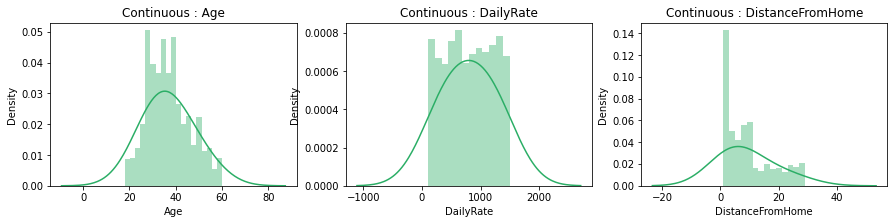

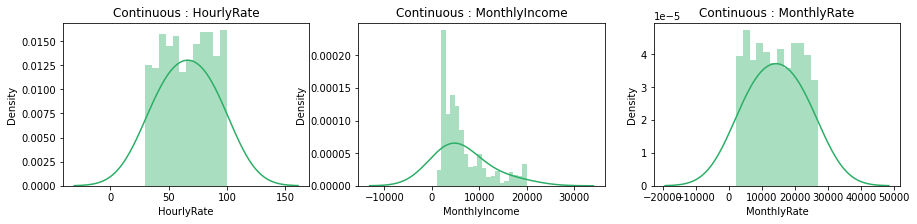

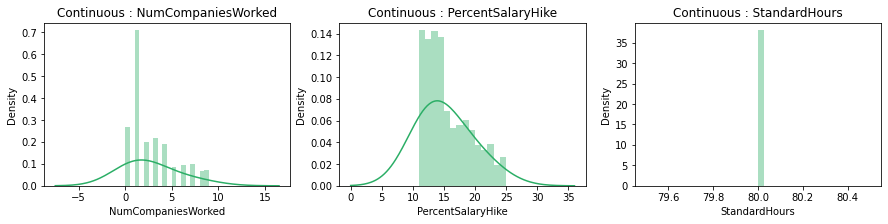

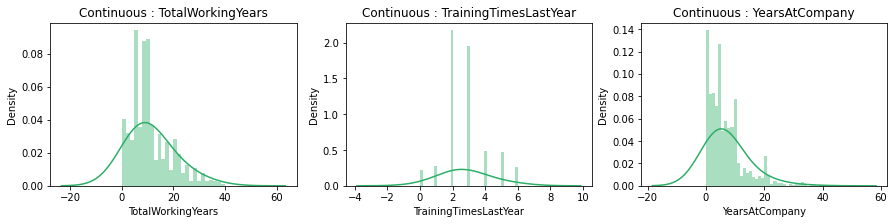

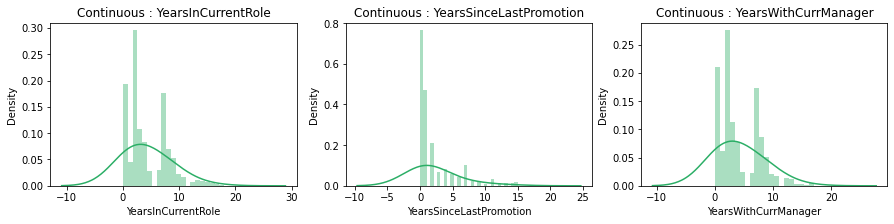

In [100]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in continuous_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a) 
        sns.distplot(df_hr[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Continuous : ' + j)
        a += 1

* Cột StandardHours chỉ có một giá trị duy nhất 

  **=> Xóa bỏ cột**


In [101]:
del df_hr['StandardHours']
continuous_features.remove('StandardHours'); 

# 6.VISUALIZATION

In [102]:
tf1 = {}
for i in range(len(text_categorical_features)):
    tf1[text_categorical_features[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        tf1[text_categorical_features[i]][j] = k

## 6.1.Chia các thuộc tính thành các nhóm theo đặc điểm chung và tách thuộc tính quyết định Attrition ra riêng

In [103]:
# Thông tin cơ bản của nhân viên
gr1 = ['Age', 'Gender','MaritalStatus', 'Education', 
      'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked']

# Thông tin công việc của nhân viên
gr2 = ['EducationField', 'Department', 'JobLevel', 'JobRole', 
      'JobInvolvement', 'OverTime', 'JobSatisfaction']

# Thông tin giữa nhân viên và công ty
gr3 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 
      'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'WorkLifeBalance']

# Thông tin của công ty
gr4 = ['PercentSalaryHike', 'StockOptionLevel', 'BusinessTravel', 
      'PerformanceRating', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'] 
# Tài chính
gr5 = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate']

df = pd.DataFrame()
df['Attrition'] = df_hr['Attrition']

## 6.2.Nhóm 1 - Mối quan hệ giữa thông tin cơ bản nhân viên với sự rời đi hay ở lại của nhân viên

### 6.2.1.Độ tuổi

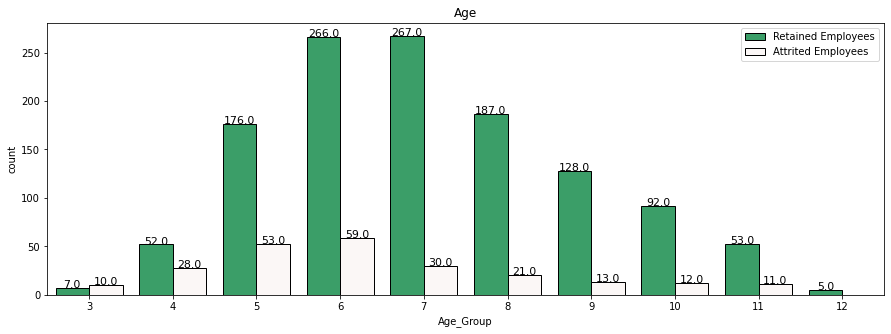

In [104]:
#Chia độ tuổi theo từng nhóm (nhóm tuổi = tuổi / 5)
df['Age_Group'] = [int(i/5) for i in df_hr['Age']]

plt.figure(figsize = (15,5))
ax = sns.countplot('Age_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

**NHẬN XÉT**

* Sự tiêu hao xuất hiện ở hầu hết các nhóm tuổi.
* Đối với các giá trị Độ tuổi từ 30 - 34, số lượng nhân viên nghỉ việc cao nhất là 59. 
* Nhân viên có Độ tuổi từ 25 - 29 đứng thứ hai với 53 nhân viên nghỉ việc tại công ty.
* Các giá trị tuổi từ 20 - 24 & 35 - 40 có số lượng gần bằng nhau với 28 & 30.
* Nhân viên trên 40 tuổi có thể là những người đã được miễn nhiệm.


### 6.2.2.Khoảng cách đi làm

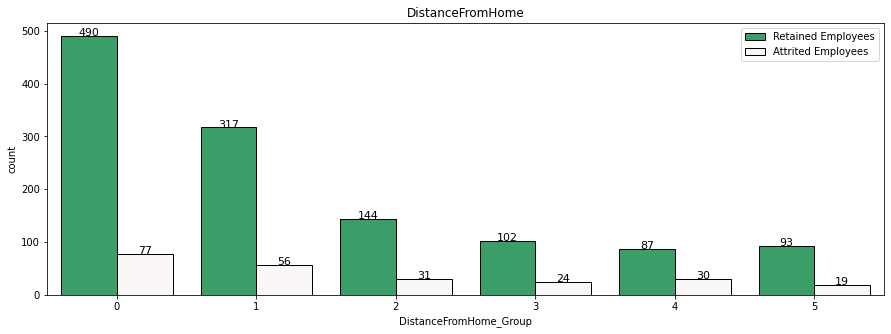

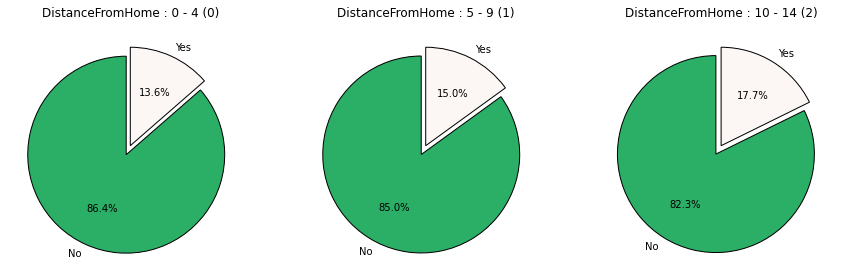

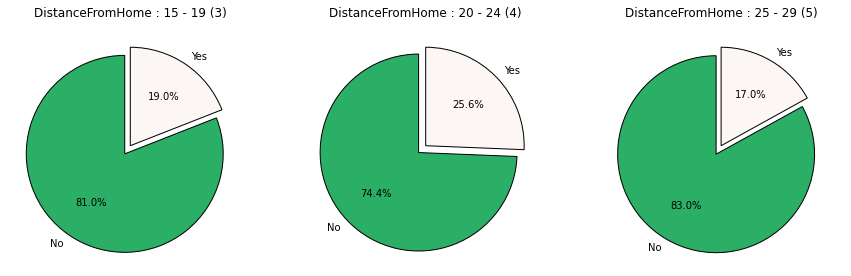

In [105]:
# Chia khoảng cách theo từng nhóm (nhóm khoảng cách = khoảng cách / 5)
df['DistanceFromHome_Group'] = [int(i/5) for i in df_hr['DistanceFromHome']]

plt.figure(figsize = (15,5))
ax = sns.countplot('DistanceFromHome_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right'); plt.title('DistanceFromHome');

for i in range(2):
    fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15)); a = 1
    for j in range(3):
        plt.subplot(1,3,a)
        if i == 0:
            l = list(df.loc[(df['DistanceFromHome_Group'] == j)]['Attrition'].value_counts())
        else:
            l = list(df.loc[(df['DistanceFromHome_Group'] == (j+3))]['Attrition'].value_counts())
            
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
        plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
                colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        if i == 0:
            plt.title('DistanceFromHome : ' + str(j*5) + ' - ' + str(j*5 + 4) + ' ('+ str(j) + ')');
        else:
            plt.title('DistanceFromHome : ' + str((j+3)*5) + ' - ' + str((j+3)*5 + 4) + ' ('+ str(j+3) + ')');
        a += 1

**NHẬN XÉT**

* Xét biểu đồ cột thì có thể thấy nhân viên ở nhóm ở gần công ty nhất (nhóm 0) có  số lượng nhân viên rời đi nhiều nhất.
* Tuy nhiên khi kiểm tra tỷ lệ phần trăm tiêu hao thì ta có thể thấy nhân viên sống trong khoảng cách từ 0 - 4 ít bị tiêu hao. 
* Khi giá trị của DistanceFromHome tăng lên, tỷ lệ tiêu hao của nhân viên cũng tăng lên!


### 6.2.3.Số năm làm việc

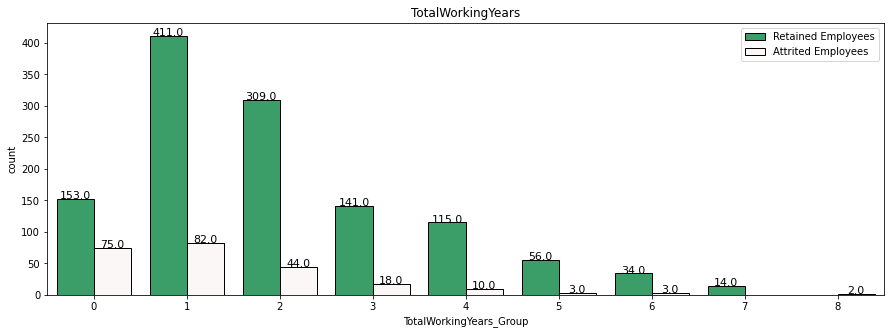

In [106]:
# Chia số năm làm việc theo từng nhóm (nhóm số năm làm việc = số năm làm việc / 5)
df['TotalWorkingYears_Group'] = [int(i/5) for i in df_hr['TotalWorkingYears']]

plt.figure(figsize = (15,5))
ax = sns.countplot('TotalWorkingYears_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('TotalWorkingYears');

**NHẬN XÉT**

* Ta có thể nói rằng nhân viên trong vòng 10 năm kinh nghiệm làm việc đầu tiên rất dễ bị sa thải!
* Khi kinh nghiệm làm việc tăng lên, cơ hội tiêu hao nhân lực sẽ giảm đi!



### 6.2.4.Giới tính và tình trạng hôn nhân


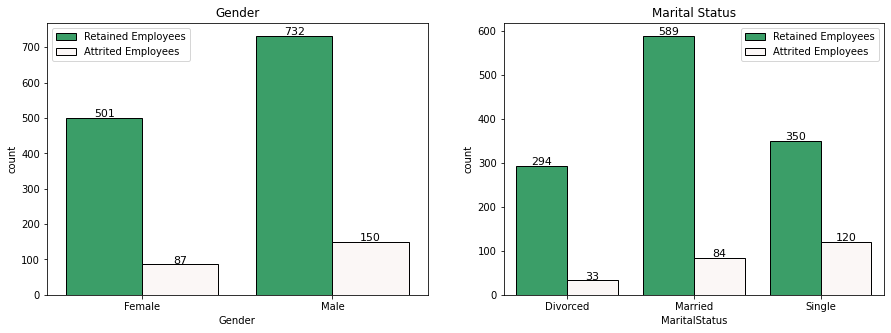

In [107]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
ax = sns.countplot('Gender',data = df_hr, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Gender'][j] for j in sorted(df_hr['Gender'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Gender');

plt.subplot(1,2,2)
ax = sns.countplot('MaritalStatus',data = df_hr, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['MaritalStatus'][j] for j in sorted(df_hr['MaritalStatus'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Marital Status');

**NHẬN XÉT**

* Số lượng nhân viên Nam bị sa thải nhiều hơn số lượng nhân viên Nữ.
* Nhân viên độc thân có số lượng tiêu hao nhiều nhất. 
* Nhân viên đã kết hôn chiếm vị trí thứ 2.
* Đã ly hôn đứng ở vị trí cuối cùng.


## 6.3.Nhóm 2 - Mối quan hệ giữa thông tin công việc của nhân viên với sự rời đi hay ở lại của nhân viên

### 6.3.1.Trình độ chuyên môn

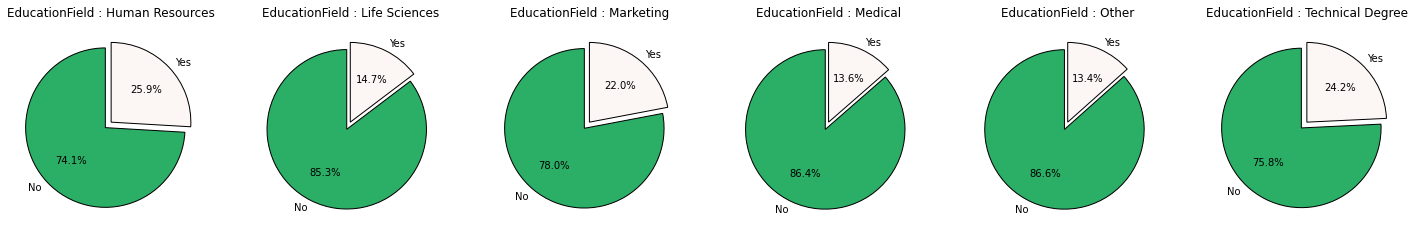

In [108]:
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (25,20))
for i in range(len(df_hr['EducationField'].unique())):
    plt.subplot(1,6,i+1)
    l = list(df_hr.loc[(df_hr['EducationField'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df_hr['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['EducationField'][k] for k in sorted(df_hr['EducationField'].unique()))
    plt.title('EducationField : ' + b[i]);

**NHẬN XÉT**

* Chúng ta có thể thấy rằng những nhân viên có Education Field là Human Resources, Technical Degree & Marketing có cơ hội bị loại bỏ cao hơn.


### 6.3.2.Làm thêm giờ 

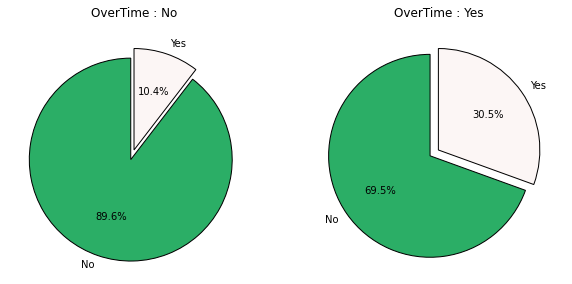

In [109]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
for i in range(len(df_hr['OverTime'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df_hr.loc[(df_hr['OverTime'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df_hr['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['OverTime'][k] for k in sorted(df_hr['OverTime'].unique()))
    plt.title('OverTime : ' + b[i]);

**NHẬN XÉT**

* Chúng ta có thể thấy rằng những người làm việc quá giờ sẽ có khả năng rời bỏ công ty cao do áp lức! 
* Tỷ lệ nghỉ việc là 30%, tức là cao gấp 3 lần so với những nhân viên không làm việc ngoài giờ.


## 6.4.Nhóm 3 - Mối quan hệ thông tin nhân viên - công ty với sự rời đi hay ở lại của nhân viên

### 6.4.1.Số năm làm việc kể từ khi được thăng chức

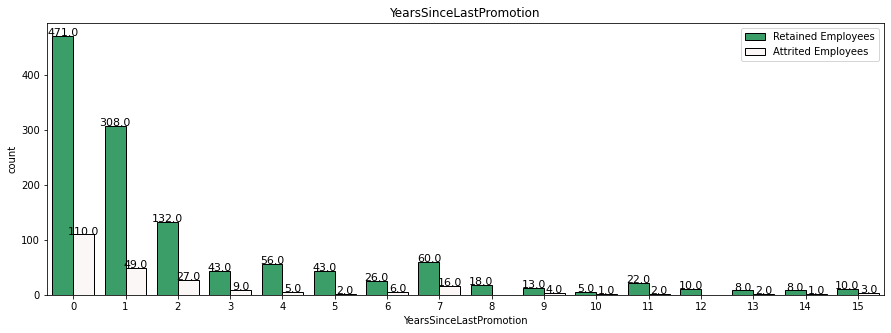

In [110]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsSinceLastPromotion', data = df_hr, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsSinceLastPromotion');

**NHẬN XÉT**

* Chúng ta có thể thấy rằng có một số lượng lớn các trường hợp tiêu hao cho giá trị năm là 0. 
* Đó có thể là giá trị đa số đại diện cho những người mới vào công ty.
* 1 & 2 năm kể từ lần thăng chức cuối cùng cũng ghi nhận một số lượng đáng kể các trường hợp nhân viên rời đi.
* 7 năm kể từ lần thăng chức cuối cùng cũng có khá nhiều trường nhân viên rời đi.

### 6.4.2.Cân bằng cuộc sống và công việc

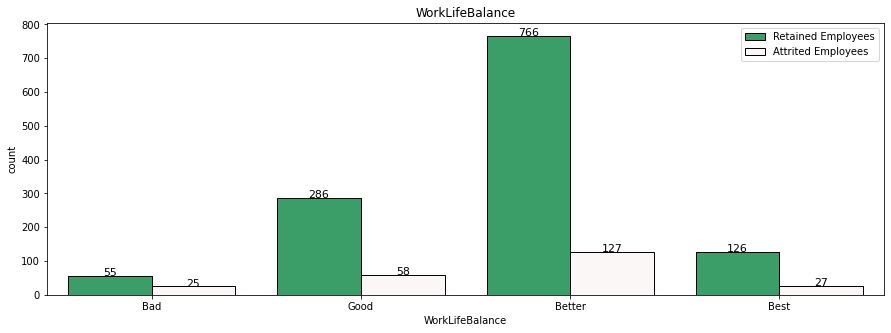

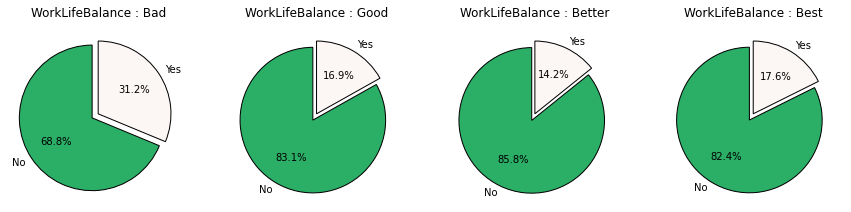

In [111]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('WorkLifeBalance', data = df_hr, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Bad', 'Good', 'Better', 'Best'])
plt.title('WorkLifeBalance');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df_hr['WorkLifeBalance'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df_hr.loc[(df_hr['WorkLifeBalance'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df_hr['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('WorkLifeBalance : ' + ['Bad', 'Good', 'Better', 'Best'][i]);

**NHẬN XÉT**

* Đúng như dự đoán, WorkLifeBalance không tốt đã dẫn đến tỷ lệ tiêu hao lớn là 31,2%.
* Đáng ngạc nhiên là Best WorkLifeBalance có giá trị phần trăm tiêu hao cao thứ hai.

## 6.5.Nhóm 4 - Mối quan hệ giữa thông tin công ty với sự rời đi hay ở lại của nhân viên

### 6.5.1.Đánh giá sự hài lòng về môi trường làm việc

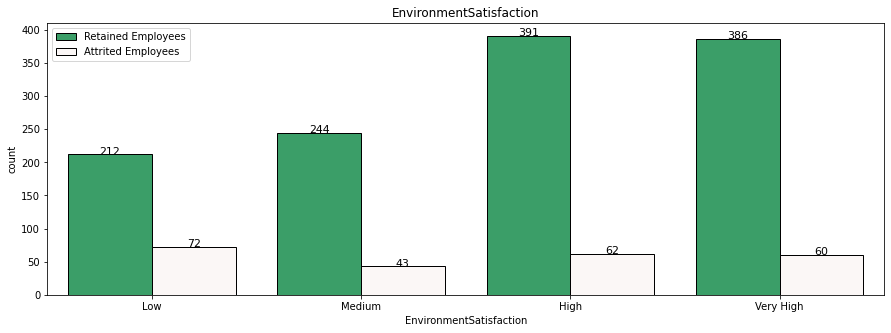

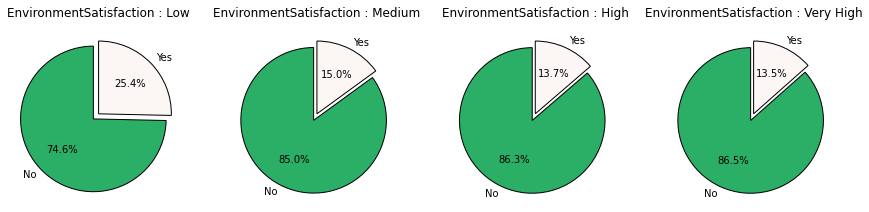

In [112]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('EnvironmentSatisfaction', data = df_hr, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('EnvironmentSatisfaction');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df_hr['EnvironmentSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df_hr.loc[(df_hr['EnvironmentSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df_hr['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('EnvironmentSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

**NHẬN XÉT**

* Các giá trị Mức độ hài lòng về môi trường Cao & Rất cao đã được ghi nhận nhiều lần nhất.
* Đúng như dự đoán, chúng có tỷ lệ tiêu hao thấp so với Mức độ hài lòng về môi trường thấp và trung bình.
* Tỷ lệ tiêu hao được cải thiện khi Sự hài lòng về Môi trường được cải thiện!

### 6.5.2.Đánh giá sự hài lòng về các mối quan hệ 

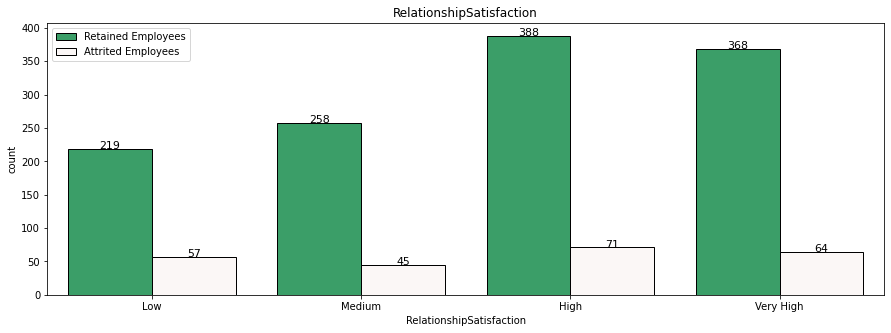

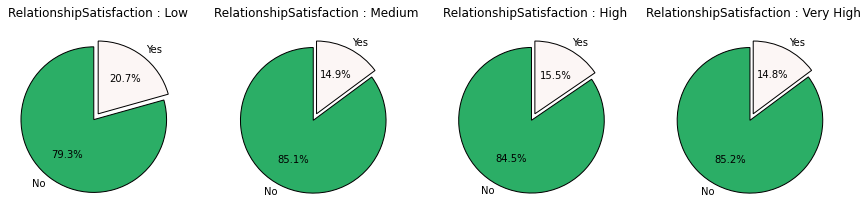

In [113]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('RelationshipSatisfaction', data = df_hr, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('RelationshipSatisfaction');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df_hr['RelationshipSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df_hr.loc[(df_hr['RelationshipSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df_hr['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('RelationshipSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

**NHẬN XÉT**

* Biểu đồ ở trên về Sự hài lòng về Mối quan hệ rất giống với Sự hài lòng về Môi trường làm việc. 
* Khi các giá trị của Sự hài lòng về Mối quan hệ được cải thiện, tỷ lệ tiêu hao sẽ giảm.

## 6.5.Nhóm 5 - Mối quan hệ giữa tài chính với sự rời đi hay ở lại của nhân viên

### 6.5.1.Thu nhập hàng tháng

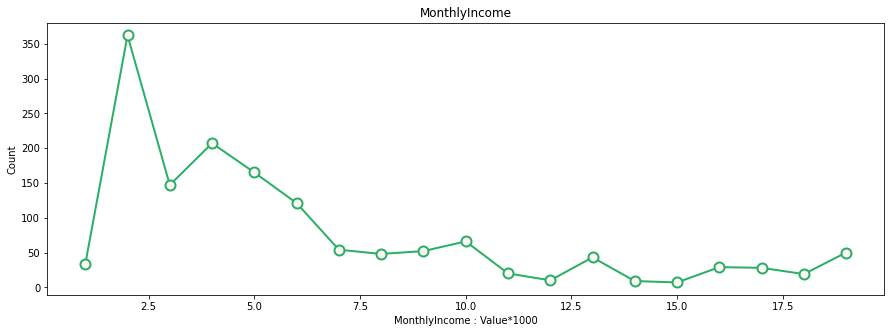

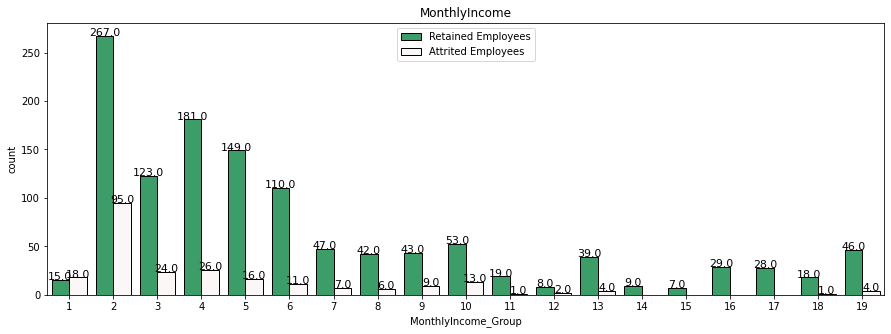

In [114]:
df['MonthlyIncome_Group'] = [int(i / 1000) for i in df_hr['MonthlyIncome']]
v1 = [df['MonthlyIncome_Group'].value_counts()[i] for i in sorted(df['MonthlyIncome_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df['MonthlyIncome_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyIncome : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyIncome");

plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyIncome_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyIncome');

**NHẬN XÉT**

* Biểu đồ nêu bật sự suy giảm tổng thể về số lượng các giá trị.
* Các giá trị Thu nhập hàng tháng trong khoảng 1000 - 2000 hiện diện với số lượng lớn. 
* Các giá trị trong khoảng 3000 - 4000 đứng thứ hai với hơn 200 giá trị có trong phạm vi này.

### 6.5.2.Tiền lương theo giờ

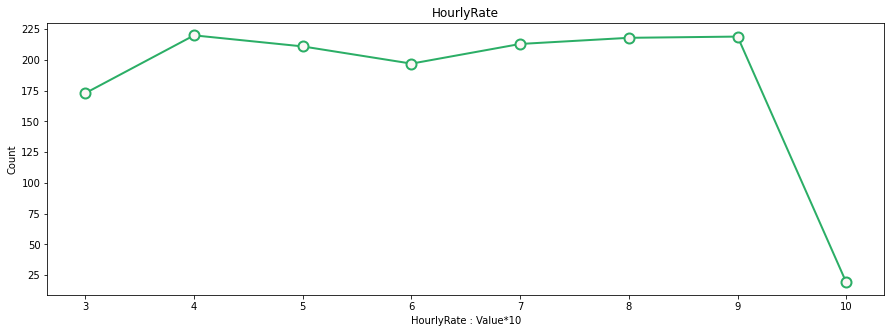

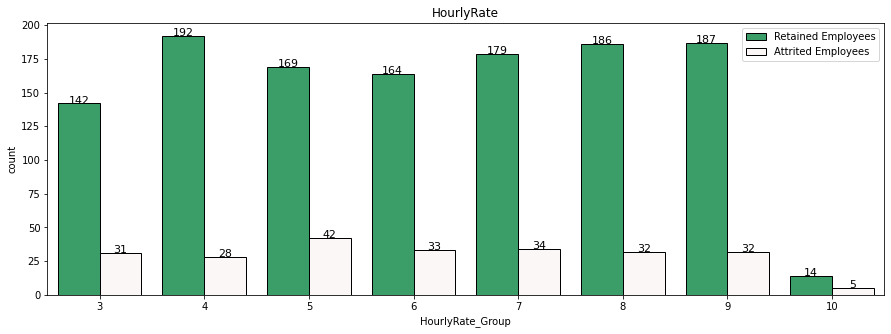

In [115]:
df['HourlyRate_Group'] = [int(i / 10) for i in df_hr['HourlyRate']]
v1 = [df['HourlyRate_Group'].value_counts()[i] for i in sorted(df['HourlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df['HourlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('HourlyRate : Value*10'); plt.ylabel('Count')
plt.title("HourlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('HourlyRate_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('HourlyRate');

**NHẬN XÉT**

* Đối với HourlyRate, các giá trị từ 30 - 100 xuất hiện với tổng số hơn 175+ mỗi giá trị.
* Tỷ lệ tiêu hao của các giá trị này cũng thấp và rất gần nhau.
* Đối với HourlyRate lớn hơn 100, có rất ít giá trị và do đó mức tiêu hao cũng cao.

### 6.5.3.Tiền lương theo ngày

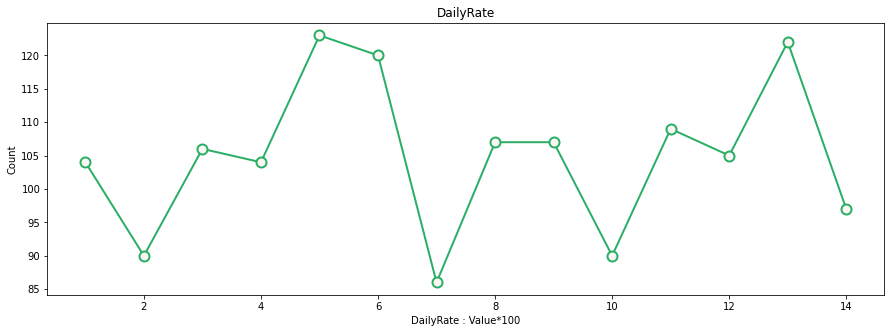

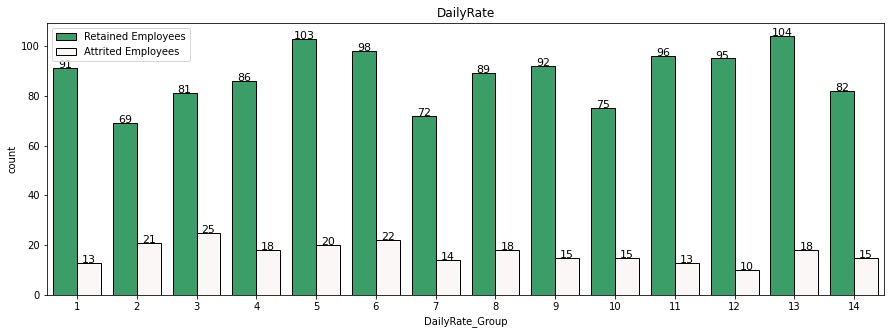

In [116]:
df['DailyRate_Group'] = [int(i / 100) for i in df_hr['DailyRate']]
v1 = [df['DailyRate_Group'].value_counts()[i] for i in sorted(df['DailyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df['DailyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('DailyRate : Value*100'); plt.ylabel('Count')
plt.title("DailyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('DailyRate_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('DailyRate');

**NHẬN XÉT**

* Số lượng nhân viên tiêu hao gần nhau. Có sự sụt giảm nhất định về số lượng giá trị.
* Các giá trị từ 600 - 700 có số lượng thấp nhất.

### 6.5.4.Tiền lương theo tháng

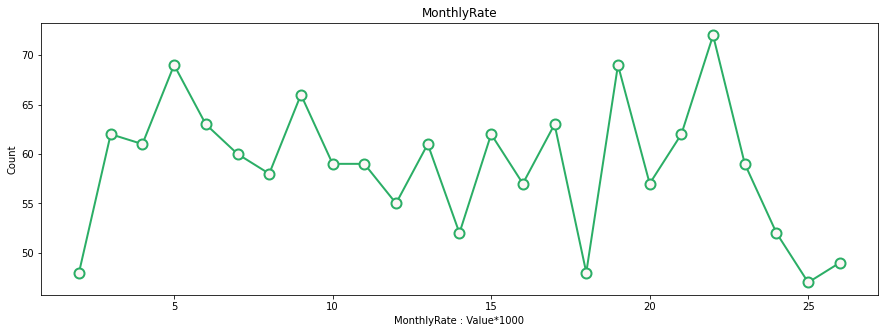

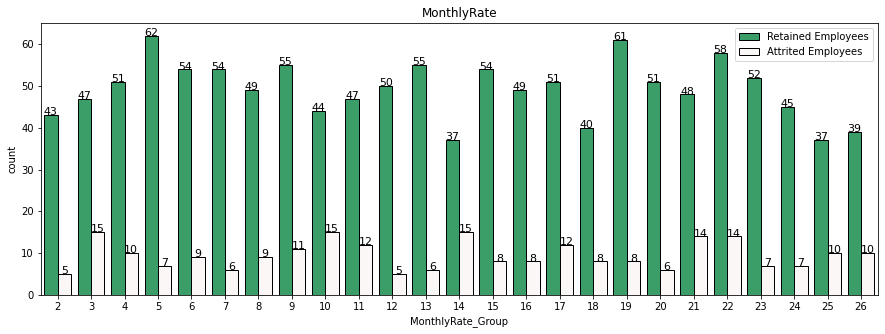

In [117]:
df['MonthlyRate_Group'] = [int(i / 1000) for i in df_hr['MonthlyRate']]
v1 = [df['MonthlyRate_Group'].value_counts()[i] for i in sorted(df['MonthlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df['MonthlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyRate : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyRate_Group', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyRate');

**NHẬN XÉT**

* Giá trị của tiêu hao nhân lực rất gần nhau.
Các giá trị trong khoảng 21000 - 22000 có số lượng cao nhất.

## 6.6.TỔNG KẾT

**Nhóm 1 - Thông tin cơ bản nhân viên:**
* Age : 20 - 44
* Gender: Male > Female
* MaritalStatus : Single > Married > Divorced
* DistanceFromHome : 20 - 24 > 15 - 19 > 25 - 29 > 10 - 14 > 5 - 9
* TotalWorkingYears : Cơ hội rất cao trong 10 năm làm việc đầu tiên

**Nhóm 2 - Thông tin công việc:**
* EducationField : Human Resources > Technical Degree > Marketing > Life Sciences > Medical > Other
* OverTime : Yes > No

**Nhóm 3 - Thông tin nhân viên - công việc:**
* YearsSinceLastPromotion : 0 > 1 > 2.
* WorkLifeBalance : Bad > Best > Good > Better

**Nhóm 4 - Thông tin công ty:**
* EnvironmentSatisfaction : Low > Medium > High > Very High
* RelationshipSatisfaction : Low > High > Medium > Very High

**Nhóm 5 - Thông tin tài chính:**
* MonthlyIncome : 2000 - 3000
* HourlyRate : 50 - 60. Các giá trị rất gần nhau.
* DailyRate : 300 - 400. Các giá trị rất gần nhau.
* MonthlyRate : Các đỉnh rất gần và nhỏ đều có.

# 7.KIỂM TRA CÂN BẰNG DỮ LIỆU

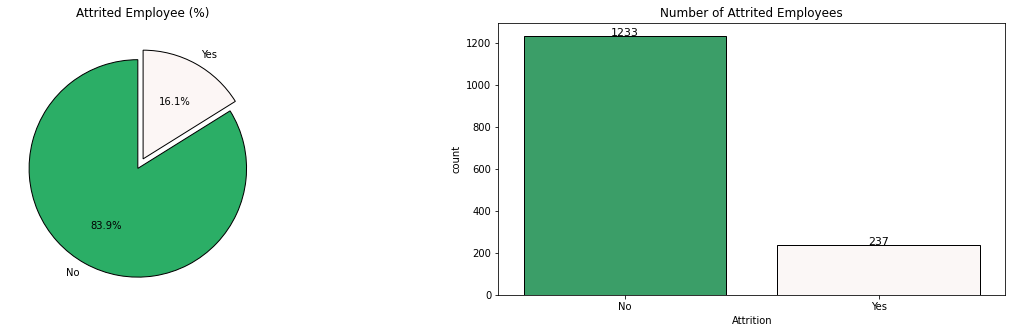

In [118]:
l = list(df_hr['Attrition'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = list(tf1['Attrition'][j] for j in sorted(df_hr['Attrition'].unique())),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Attrited Employee (%)');

plt.subplot(1,2,2)
ax = sns.countplot('Attrition',data = df_hr, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Attrition'][j] for j in sorted(df_hr['Attrition'].unique()))
plt.title('Number of Attrited Employees');
plt.show()

* Bộ dữ liệu không cân bằng với xu hướng nghiêng về Nhân viên ở lại công ty theo tỷ lệ 5,2 : 1 đối với Nhân viên ở lại : Nhân viên được rời đi. 
  **=> cân bằng tập dữ liệu bằng Phân tích SMOTE!**

# 8.CÂN BẰNG DỮ LIỆU BẰNG SMOTE

In [119]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [120]:
cols = list(df_hr.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
#under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df_hr.loc[:,cols]
t1 = df_hr.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

* Cân bằng dữ liệu bằng cách tăng nhóm thiểu số lên nhóm đa số. 
* Trong trường hợp này là tăng các điểm dữ liệu thiểu số vì dữ liệu rất ít.
* Đối với các bộ dữ liệu không cân bằng, sẽ sao chép dữ liệu để xử lý sai lệch tiềm ẩn trong các dự đoán.

In [121]:
#Dataframe đã cân bằng 
f1

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,23,1,439,1,9,3,2,2,0,83,...,3,2,0,3,2,2,0,0,0,0
2277,30,2,707,2,1,2,1,2,1,61,...,3,3,1,10,4,3,10,7,5,7
2278,22,0,412,1,6,2,3,1,0,71,...,3,2,0,3,2,3,0,0,0,0
2279,33,1,809,1,7,2,1,2,1,70,...,3,2,0,9,3,3,9,5,0,4


In [122]:
#Thuộc tính quyết định đã được tách
t1

0       1
1       0
2       1
3       0
4       0
       ..
2276    1
2277    1
2278    1
2279    1
2280    1
Name: Attrition, Length: 2281, dtype: int64

# 9.THỰC HIỆN THUẬT TOÁN

In [123]:
# Tách dữ liệu train và test (dữ liệu train=70%, test=30%)
X_train, X_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3,random_state=10)

## 9.1.K-Nearest Neighbor (KNN)

In [124]:
# Thực hiện thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import classification_report
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
start_knn = time.time()
knn_scores =  []

for i in range (1,12):
    knc = KNeighborsClassifier(i)
    knn_pred = knc.fit(X_train, y_train).predict(X_test)
    knn_scores.append(metrics.accuracy_score(y_test, knn_pred))
    max_knn_score = max (knn_scores)
knn_score_ind = [i for i, v in enumerate(knn_scores) if v == max_knn_score]
end_knn =time.time()
times_knn = timedelta(seconds=round(end_knn - start_knn,4)).total_seconds()
print('Highest Accuracy Score : {}% with k = {}'.format(max_knn_score*100, list(map(lambda x: x + 1, knn_score_ind))))
print ('Time', times_knn)
knn_score = max_knn_score
accuracies_max_knn = knn_score
print("Accuracy", accuracies_max_knn)
print("Report", metrics.classification_report(y_test, knn_pred))

Highest Accuracy Score : 80.14598540145985% with k = [1, 2]
Time 0.7233
Accuracy 0.8014598540145985
Report               precision    recall  f1-score   support

           0       0.80      0.58      0.67       378
           1       0.61      0.82      0.70       307

    accuracy                           0.69       685
   macro avg       0.71      0.70      0.69       685
weighted avg       0.72      0.69      0.69       685



Text(0.5, 1.0, 'K-Nearest Neighbors Accuracy Score : 0.8014598540145985')

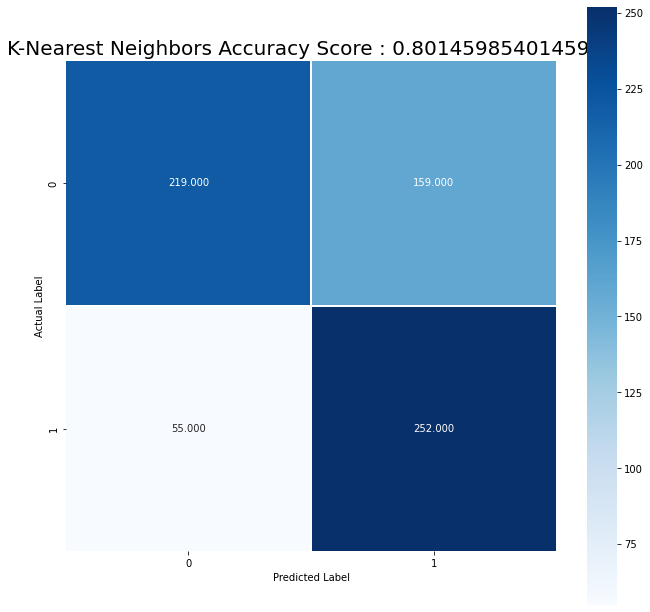

In [125]:
# Tiếp tục thực hiện thuật toán KNN
# Vẽ ma trận nhầm lẫn
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(11,11))
ax = sns.heatmap(knn_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Blues')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'K-Nearest Neighbors Accuracy Score : {0}'.format(knn_score)
plt.title(title, size =20)

## 9.2.Random Forest

In [126]:
# Thực hiện thuật toán Random Forest
rfc = RandomForestClassifier()
start_rf =time.time()
rf_pred = rfc.fit(X_train, y_train).predict(X_test)
end_rf= time.time()
times_rf = timedelta(seconds=round(end_rf-start_rf,4)).total_seconds()
print ("time", times_rf)

rf_score = metrics.accuracy_score(y_test, rf_pred)
accuracy_rf = rf_score
print("Accuracy", accuracy_rf)
print("Report", metrics.classification_report(y_test, rf_pred))

time 0.3751
Accuracy 0.9094890510948905
Report               precision    recall  f1-score   support

           0       0.90      0.94      0.92       378
           1       0.93      0.87      0.90       307

    accuracy                           0.91       685
   macro avg       0.91      0.91      0.91       685
weighted avg       0.91      0.91      0.91       685



Text(0.5, 1.0, 'Random Forest Accuracy Score : 0.9094890510948905')

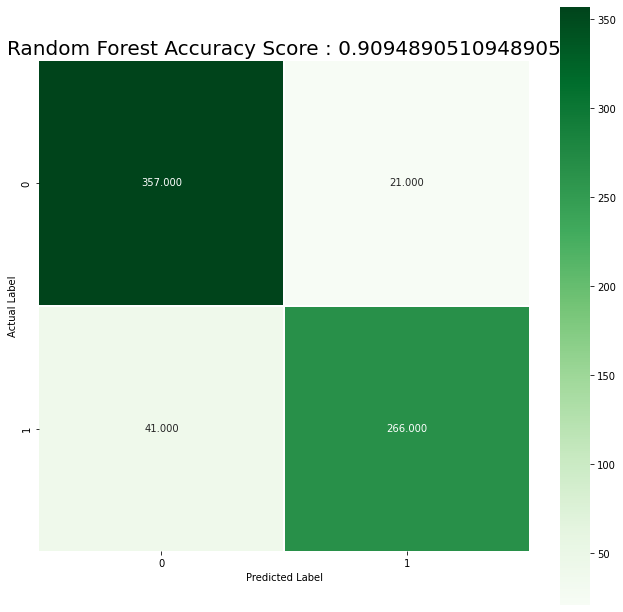

In [127]:
# Vẽ ma trận nhầm lẫn cho mô hình thuật toán Random Forest
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(11,11))
ax =sns.heatmap(rf_cm, annot =True, fmt =".3f",linewidths = .5, square =True, cmap= 'Greens')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Random Forest Accuracy Score : {0}'.format(rf_score)
plt.title(title, size =20)

## 9.3.Decision Trees (ID3)

In [128]:
# Thực hiện thuật toán Decision Trees (ID3)
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tree = time.time()
id3_pred = clf.fit(X_train, y_train).predict(X_test)
end_tree = time.time()
times_tree_id3 = timedelta(seconds=round(end_tree - start_tree,4)).total_seconds()
print("Time decision tree (ID3)",times_tree_id3)
id3_score = metrics.accuracy_score(y_test, id3_pred)
accuracy_tree_id3 = id3_score
print("Accuracy",accuracy_tree_id3)
print("Report",metrics.classification_report(y_test,id3_pred))

Time decision tree (ID3) 0.0285
Accuracy 0.8043795620437956
Report               precision    recall  f1-score   support

           0       0.85      0.78      0.81       378
           1       0.76      0.83      0.79       307

    accuracy                           0.80       685
   macro avg       0.80      0.81      0.80       685
weighted avg       0.81      0.80      0.80       685



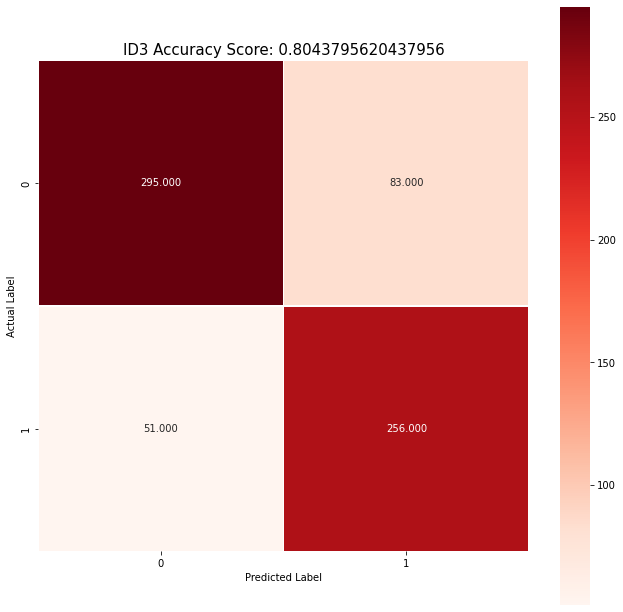

In [129]:
# Vẽ ma trận nhầm lẫn cho thuật toán Decision Tree (ID3)
id3_cm = metrics.confusion_matrix(y_test, id3_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(id3_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'ID3 Accuracy Score: {0}'.format(id3_score)
plt.title(title,size=15)
plt.show()

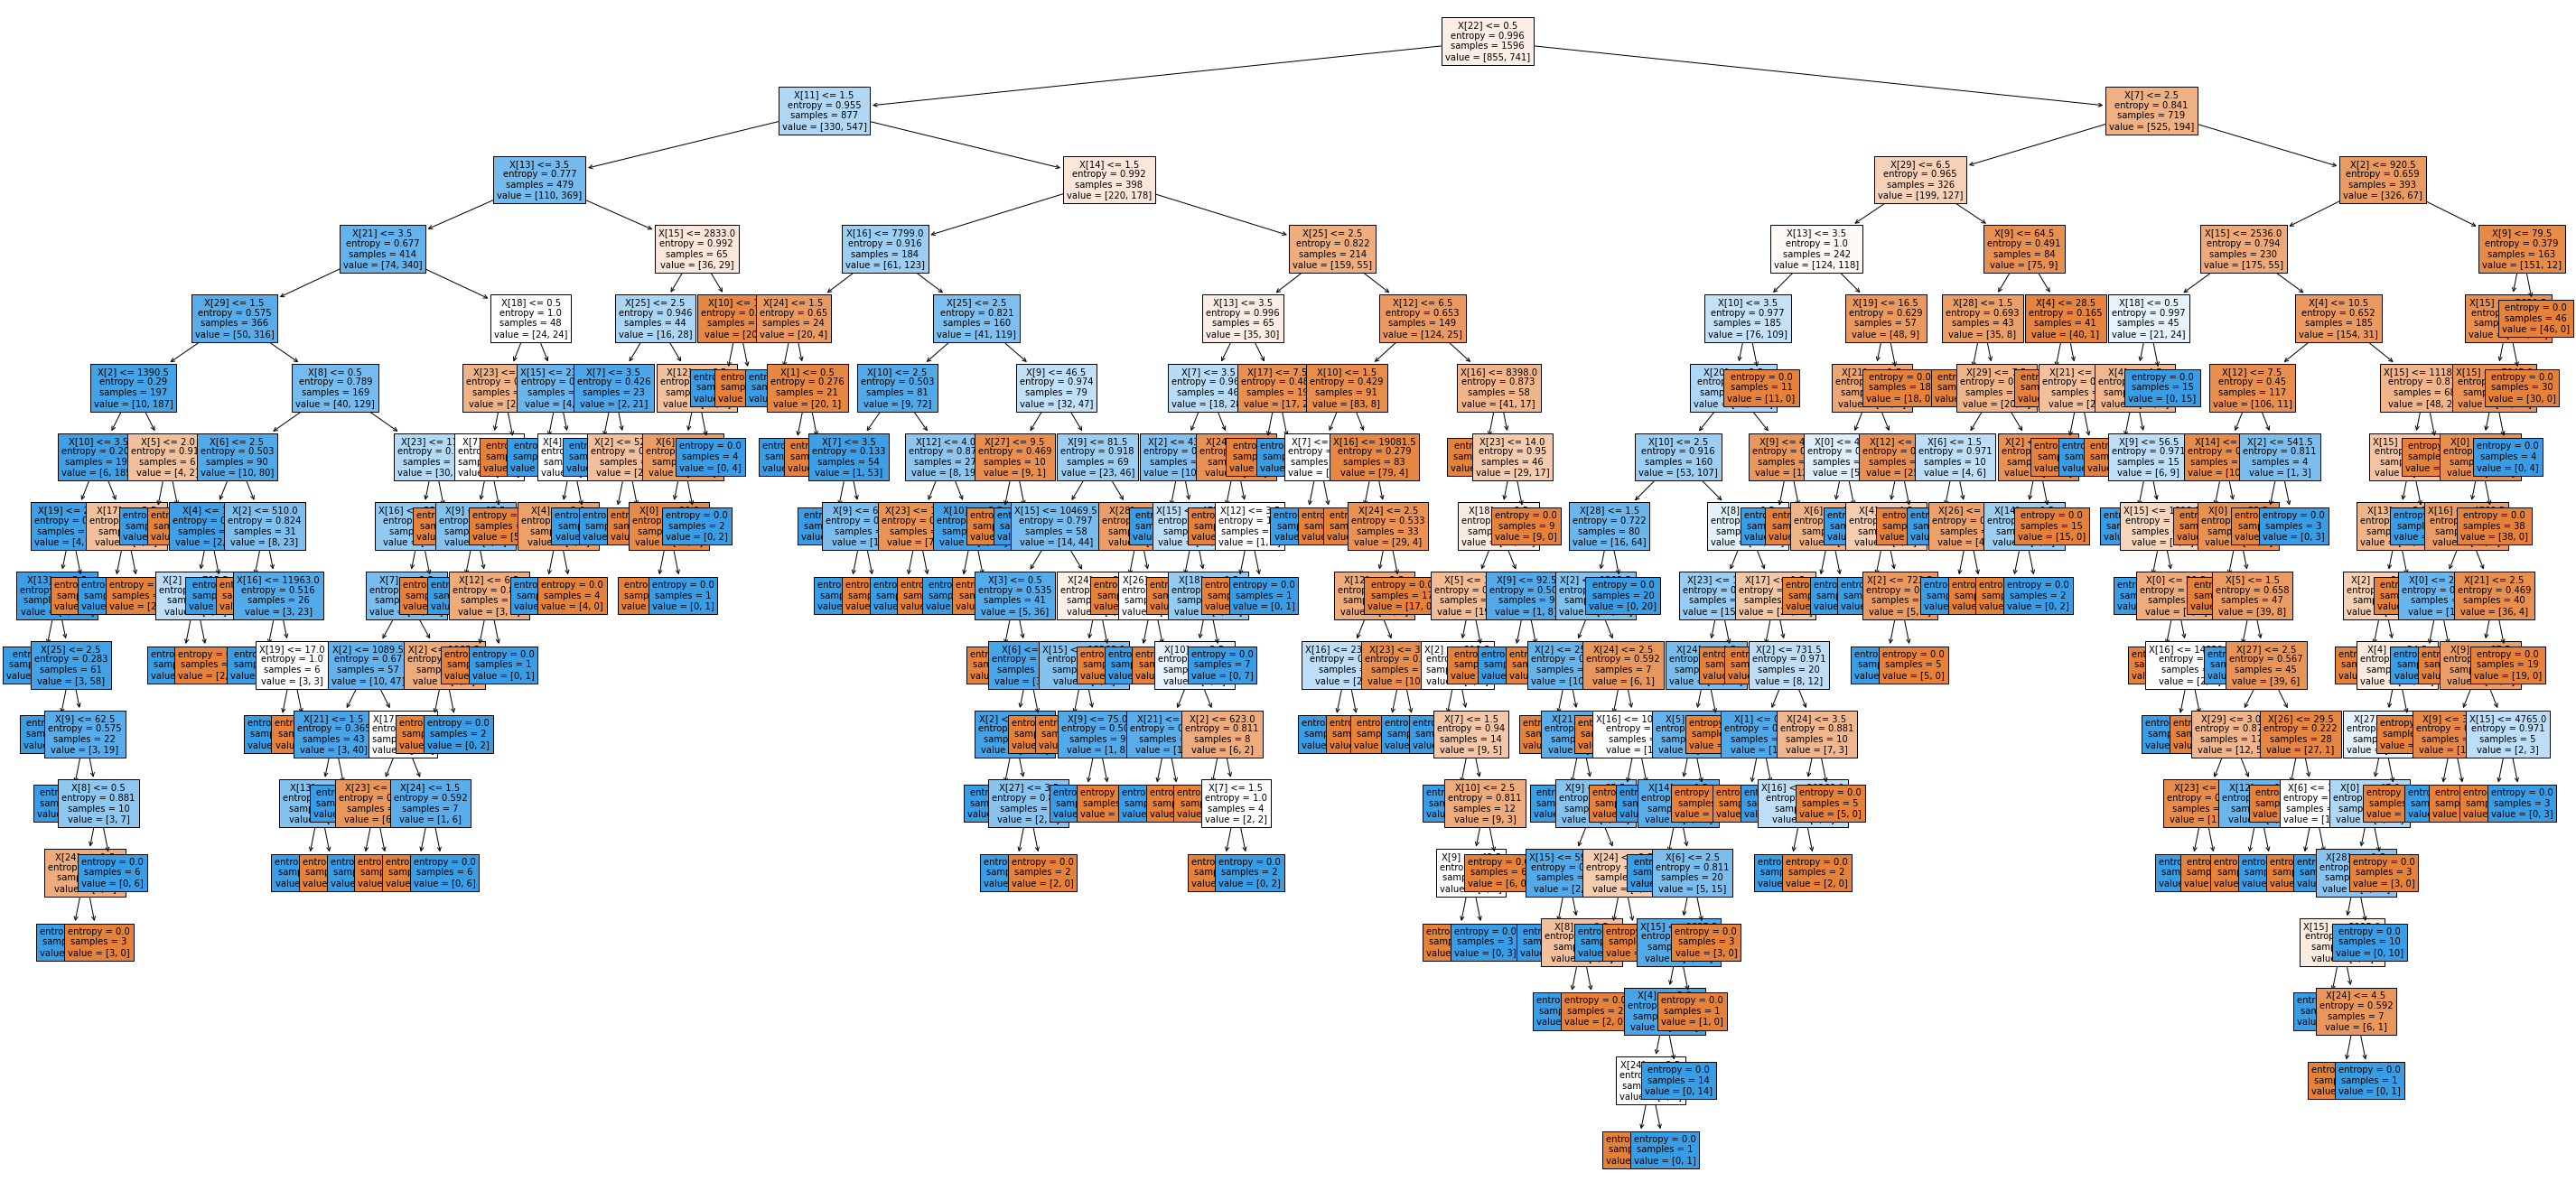

In [130]:
# Vẽ cây Decision Tree (ID3)
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree_id3',dpi=100)
plt.show()

## 9.4.Decision Trees (CART)

In [131]:
# Thực hiện thuật toán Decision Trees (CART)
clf1 = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

start_cart = time.time()
cart_pred = clf1.fit(X_train, y_train).predict(X_test)
end_cart = time.time()
times_tree_cart = timedelta(seconds=round(end_cart - start_cart,4)).total_seconds()
print("Time decision tree (CART)",times_tree_cart)
cart_score = metrics.accuracy_score(y_test, cart_pred)
accuracy_tree_cart = cart_score
print("Accuracy",accuracy_tree_cart)
print("Report",metrics.classification_report(y_test,cart_pred))

Time decision tree (CART) 0.0271
Accuracy 0.8043795620437956
Report               precision    recall  f1-score   support

           0       0.84      0.80      0.82       378
           1       0.77      0.81      0.79       307

    accuracy                           0.80       685
   macro avg       0.80      0.80      0.80       685
weighted avg       0.81      0.80      0.80       685



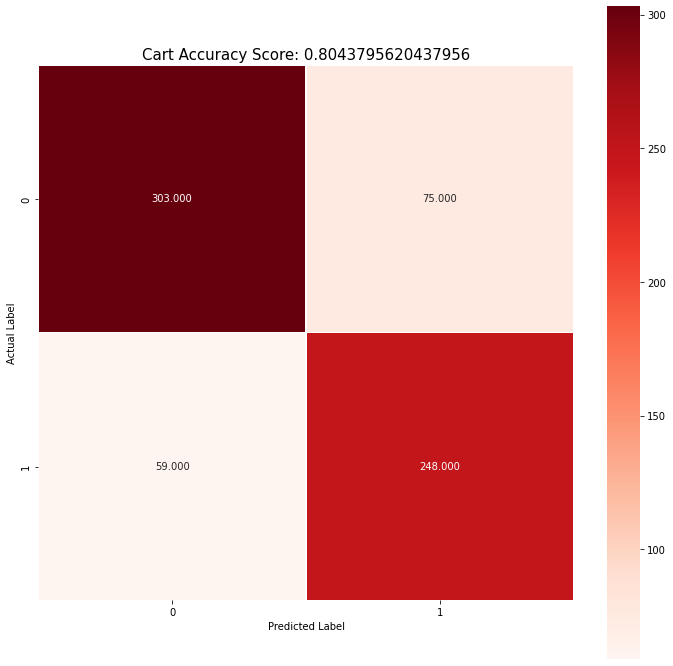

In [132]:
# Vẽ ma trận nhầm lẫn cho thuật toán Decision Tree (CART)
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(12,12))
ax=sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Cart Accuracy Score: {0}'.format(cart_score)
plt.title(title,size=15)
plt.show()

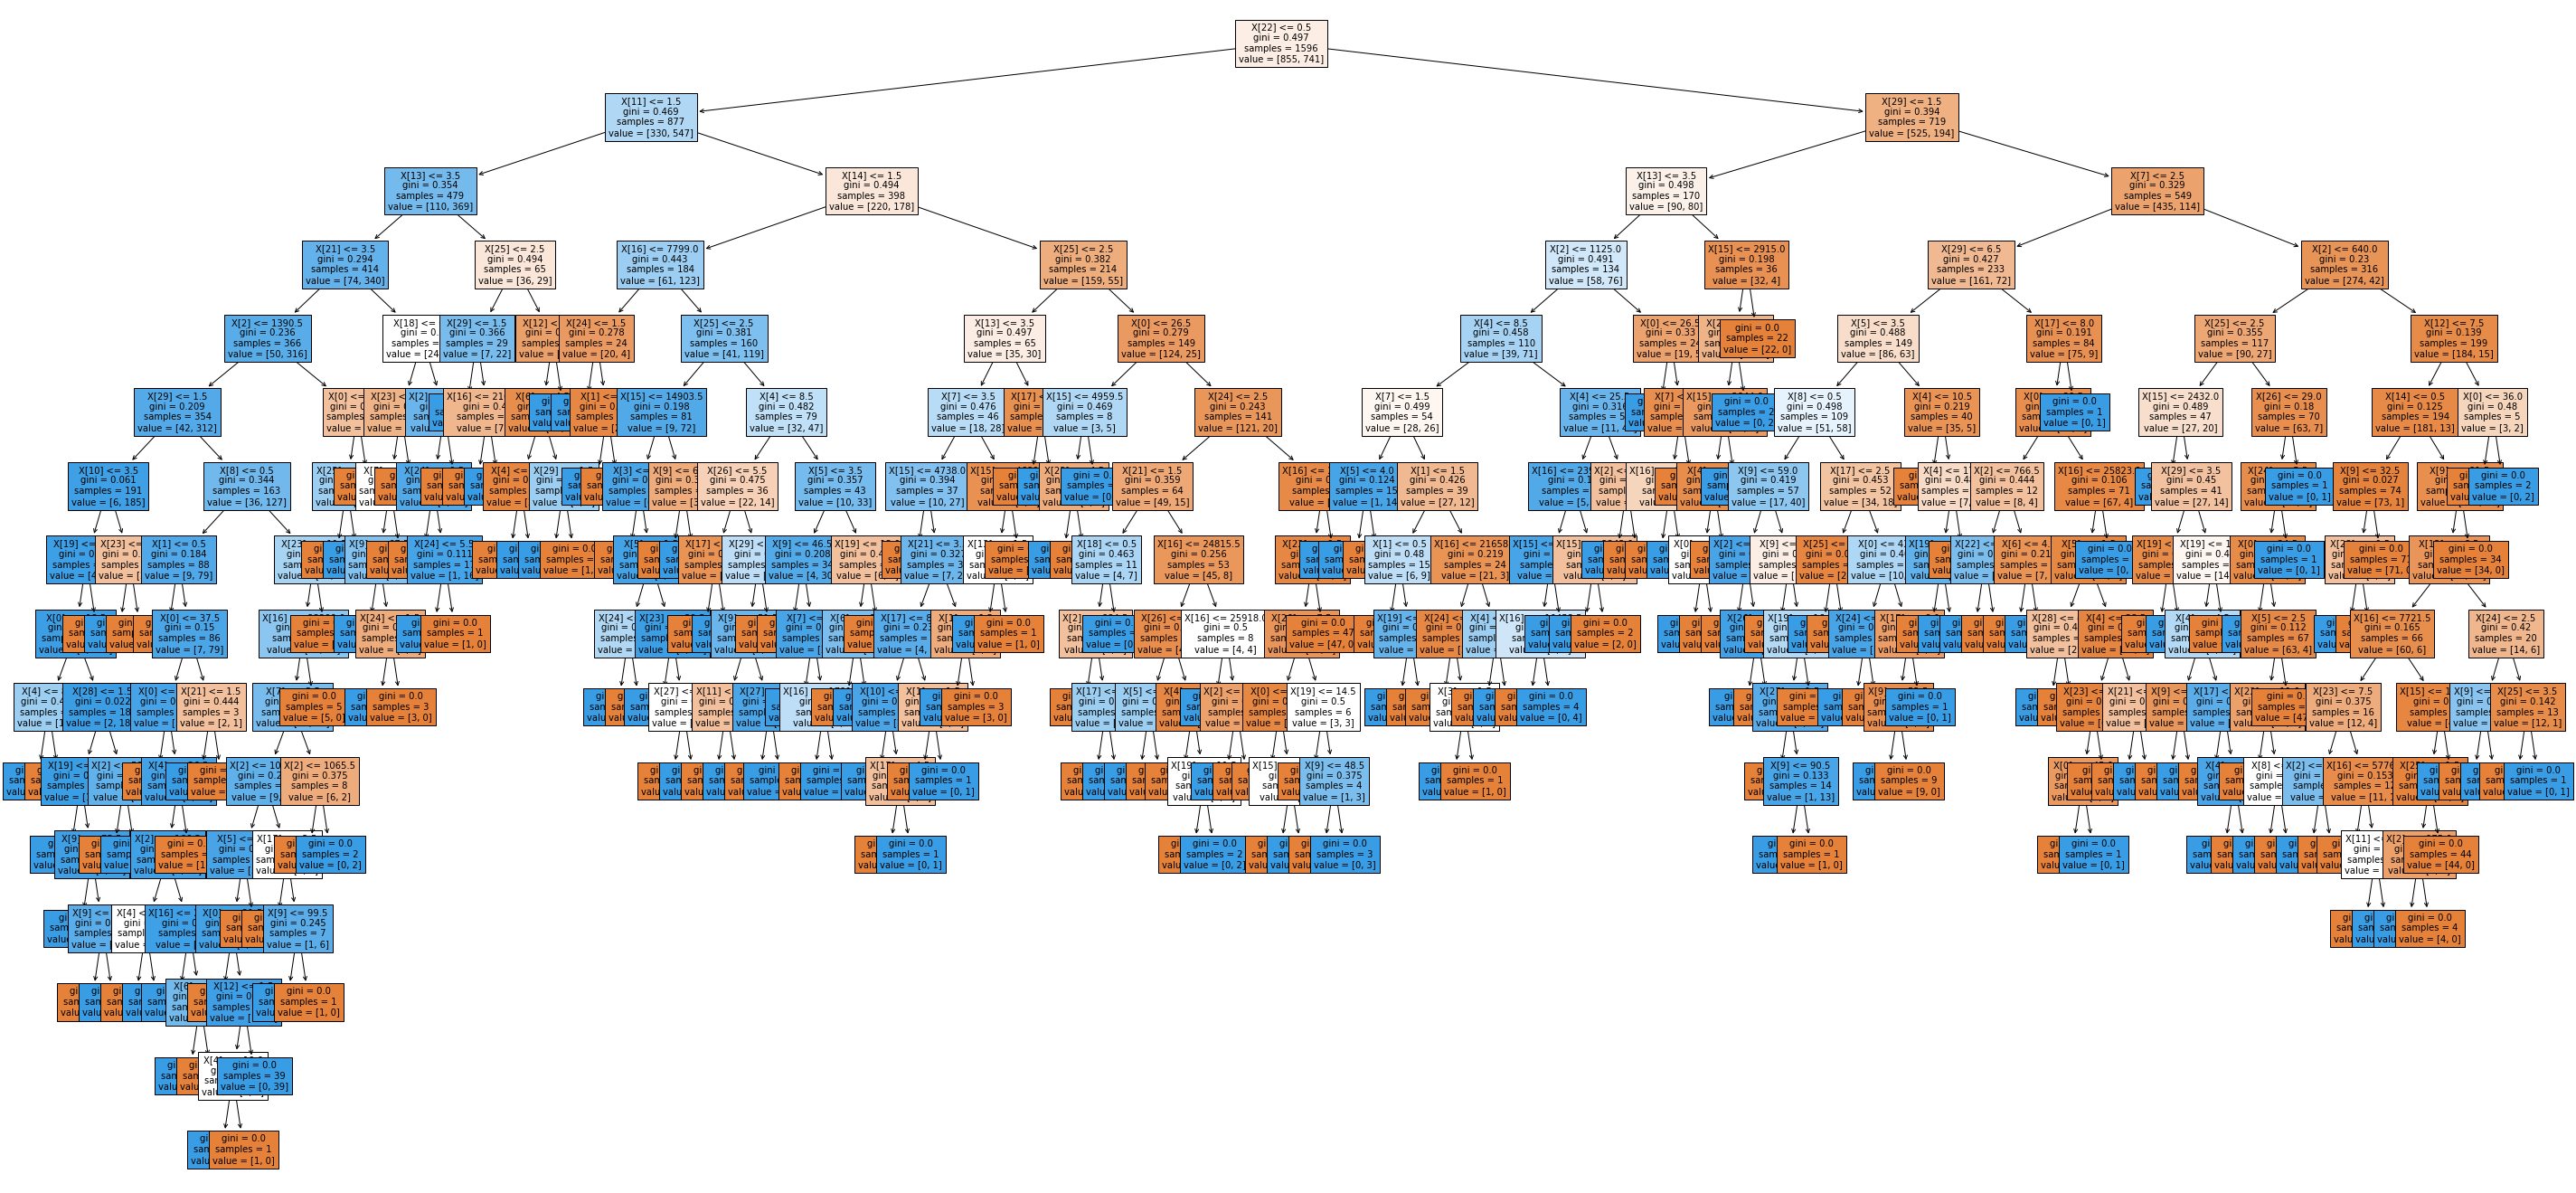

In [133]:
# Vẽ cây Decision Tree (CART)
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf1,filled=True,fontsize=10)
plt.savefig('decision_tree_cart',dpi=100)
plt.show()

## 9.5.Naive Bayes 

In [134]:
# Thực hiện thuật toán Naive Bayes 
nv = GaussianNB()
start_nv = time.time()
nv_pred = nv.fit(X_train, y_train).predict(X_test)
end_nv = time.time()
times_nv = timedelta(seconds=round(end_nv - start_nv,4)).total_seconds()
print("Time Naive Bayes",times_nv)
nv_score = metrics.accuracy_score(y_test, nv_pred)
accuracy_nv = nv_score
print("Accuracy",accuracy_nv)
print("Report",metrics.classification_report(y_test,nv_pred))

Time Naive Bayes 0.0084
Accuracy 0.7328467153284671
Report               precision    recall  f1-score   support

           0       0.83      0.65      0.73       378
           1       0.66      0.83      0.74       307

    accuracy                           0.73       685
   macro avg       0.74      0.74      0.73       685
weighted avg       0.75      0.73      0.73       685



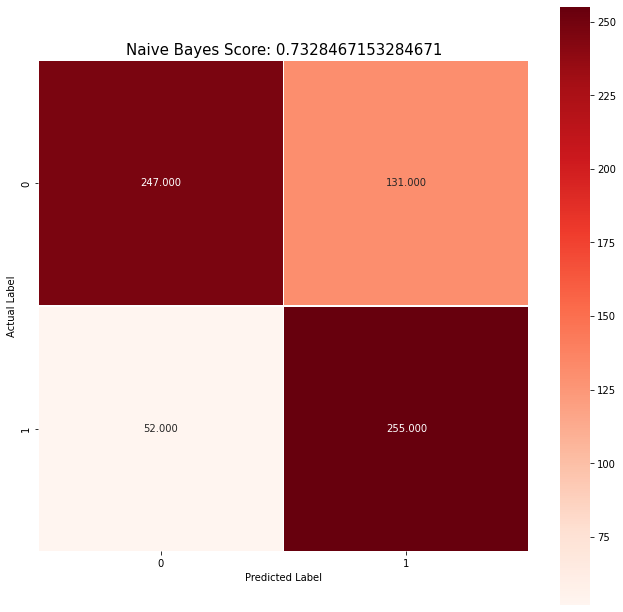

In [135]:
# Vẽ ma trận nhầm lẫn cho thuật toán Naive Bayes
nv_cm = metrics.confusion_matrix(y_test, nv_pred)
plt.figure(figsize=(11,11))
ax=sns.heatmap(nv_cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Reds')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
title = 'Naive Bayes Score: {0}'.format(nv_score)
plt.title(title,size=15)
plt.show()

## 9.6.Logistic Regression

In [136]:
# Thêm thư viện
from sklearn.neighbors import KNeighborsClassifier
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
start_lr = time.time()
lr_scores =  []

In [137]:
# Check thời gian thực hiện thuật toán 
lr = LogisticRegression(max_iter=3300)
start_lr = time.time()
lr_pred = lr.fit(X_train, y_train).predict(X_test)
end_lr = time.time()
times_lr = timedelta(seconds=round(end_lr - start_lr,4)).total_seconds()
print("Time Logistic Regression (lr)",times_lr)

Time Logistic Regression (lr) 2.3619


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
# Thực hiện thuật toán Logistic Regression
lr_score = metrics.accuracy_score(y_test, lr_pred)
accuracies_logistic_regression=lr_score
print("Accuracy", lr_score)
print("Report", metrics.classification_report(y_test, lr_pred,labels=np.unique(lr_pred)))

Accuracy 0.7795620437956204
Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80       378
           1       0.75      0.77      0.76       307

    accuracy                           0.78       685
   macro avg       0.78      0.78      0.78       685
weighted avg       0.78      0.78      0.78       685



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.7854014598540145')

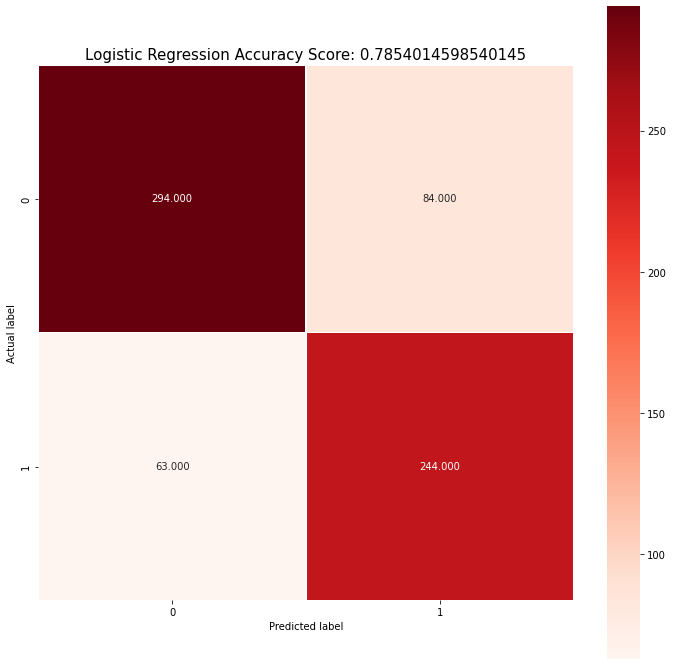

In [85]:
# Vẽ ma trận nhầm lẫn cho thuật toán Logistic Regression
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(12,12))
sns.heatmap(lr_cm,annot=True, fmt=".3f", linewidths=.5, square =True, cmap='Reds')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Logistic Regression Accuracy Score: {0}'. format(lr_score)
plt.title(title, size =15)

# 10.SO SÁNH CÁC THUẬT TOÁN

## 10.1.Thời gian chạy các thuật toán

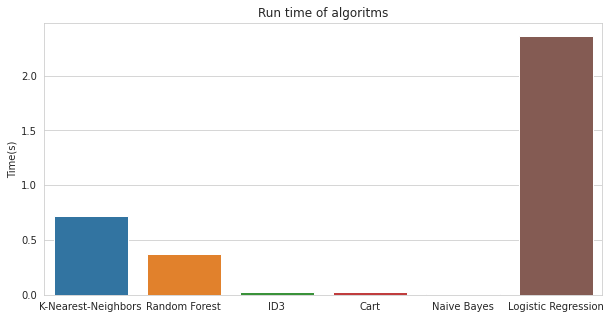

In [139]:
colors = ['blue', 'green', 'red', 'bwr', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,6,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algoritms')
sns.barplot(x=list(['K-Nearest-Neighbors','Random Forest','ID3','Cart','Naive Bayes','Logistic Regression']), 
            y= list([times_knn, times_rf, times_tree_id3, times_tree_cart, times_nv, times_lr]))
plt.show()

**Nhận xét**
* Thuật toán Logicstic Regression có thời gian chạy cao nhất
* Thuật toán Naive Bayes có thời gian chạy thấp nhất
* ID3 và Cart có thời gian chạy xấp xỉ nhau

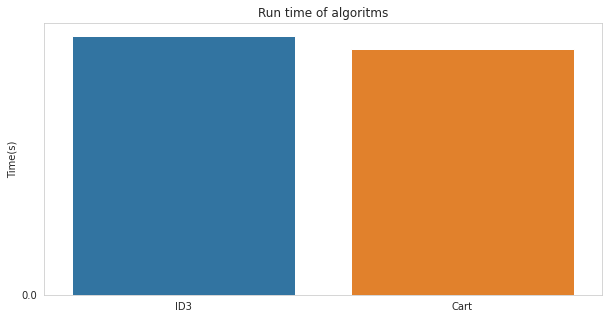

In [148]:
# Check kĩ hơn về thời gian chạy giữa ID3 và Cart
colors = ['blue', 'green']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,6,0.5))
plt.ylabel('Time(s)')
plt.title('Run time of algoritms')
sns.barplot(x=list(['ID3','Cart']), y= list([times_tree_id3, times_tree_cart]))
plt.show()

**Nhận xét**
* ID3 có thời gian chạy nhỉnh hơn 1 chút so với Cart

## 10.2.Độ chính xác các thuật toán

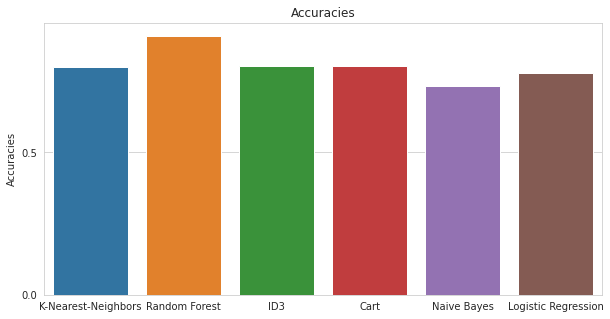

In [141]:
colors = ['blue', 'green', 'red', 'bwr', 'purple']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,1,0.5))
plt.ylabel('Accuracies')
plt.title('Accuracies')
sns.barplot(x=list(['K-Nearest-Neighbors','Random Forest','ID3','Cart','Naive Bayes', 'Logistic Regression']), 
            y= list([accuracies_max_knn, accuracy_rf, accuracy_tree_id3, accuracy_tree_cart, accuracy_nv, accuracies_logistic_regression]))
plt.show()

**Nhận xét**
* Random Forest có độ chính xác cao nhất
* Sau đó là KNN và Cart
* Naive Bayes có độ chính xác thấp nhất

**=> Chọn thuật toán Random Forest để làm dự đoán**

# 11.XÂY DỰNG PHẦN MỀM DỰ ĐOÁN

In [149]:
# Tìm thuộc tính có độ tin cậy cao để chọn làm thuộc tính dự đoán
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=f1.columns).sort_values(ascending=False)
feature_imp

StockOptionLevel            0.061648
MonthlyIncome               0.060173
JobInvolvement              0.051810
MonthlyRate                 0.046458
DailyRate                   0.045678
JobSatisfaction             0.045609
TotalWorkingYears           0.045508
Age                         0.043518
YearsWithCurrManager        0.043151
HourlyRate                  0.043019
EnvironmentSatisfaction     0.042857
DistanceFromHome            0.040013
JobLevel                    0.038941
YearsAtCompany              0.036078
WorkLifeBalance             0.034596
BusinessTravel              0.032164
YearsInCurrentRole          0.031592
RelationshipSatisfaction    0.031057
TrainingTimesLastYear       0.030547
Education                   0.029696
PercentSalaryHike           0.024672
NumCompaniesWorked          0.023902
YearsSinceLastPromotion     0.021506
JobRole                     0.021091
EducationField              0.019574
MaritalStatus               0.016134
OverTime                    0.013489
G

In [150]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [151]:
selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)

15

In [152]:
print(selected_feat)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')


=> Chọn cột
* StockOptionLevel            
* MonthlyIncome               
* JobInvolvement         
* MonthlyRate     
* DailyRate     

In [154]:
df_hr[["MonthlyIncome","StockOptionLevel","MonthlyRate","DailyRate","JobInvolvement"]].head(10)

,MonthlyIncome,StockOptionLevel,MonthlyRate,DailyRate,JobInvolvement
0,5993,0,19479,1102,3
1,5130,1,24907,279,2
2,2090,0,2396,1373,2
3,2909,0,23159,1392,3
4,3468,1,16632,591,3
5,3068,0,11864,1005,3
6,2670,3,9964,1324,4
7,2693,1,13335,1358,3
8,9526,0,8787,216,2
9,5237,2,16577,1299,3


Chọn hàng 0 với hàng 3 để test